In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score


In [68]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
data = data.drop(['Time', 'Amount'], axis = 1)
data.isna().sum().to_frame('Null Values')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

<AxesSubplot:>

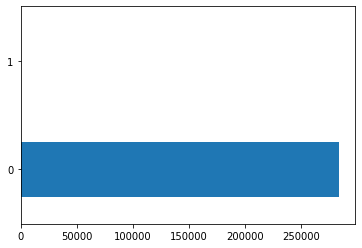

In [16]:
data['Class'].value_counts().plot.barh()

In [72]:
X = data. drop("Class", axis = 1)
y = data['Class']
print(X.shape,y.shape)

(284807, 28) (284807,)


In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [77]:
smote = SMOTE(random_state = 42)
X_smote, y_smote = smote.fit_resample(x_train, y_train)

In [79]:
total_1 = len(y_smote[y_smote==1])
total_0 = len(y_smote[y_smote==0])

<BarContainer object of 2 artists>

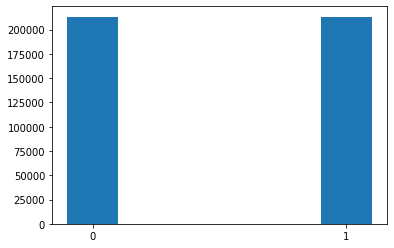

In [80]:
plt.bar(['0', '1'], height = [total_0, total_1], width = 0.2 ) 

In [50]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [55]:
y_pred = clf.predict(x_test)
conf_mx = confusion_matrix(y_test, y_pred)

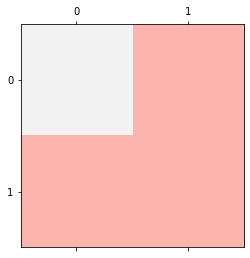

In [61]:
plt.matshow(conf_mx, cmap = plt.cm.Pastel1)

In [83]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators =[ ('lr', log_clf), ('rndf' , rnd_clf), ('svc', svm_clf) ], voting = 'hard')
voting_clf.fit(X_smote , y_smote)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rndf', RandomForestClassifier()),
                             ('svc', SVC())])

In [90]:
rnd_clf.fit(X_smote, y_smote)
y_pred = rnd_clf.predict(x_test)

In [91]:
conf_mx = confusion_matrix(y_test, y_pred)

In [92]:
f1_score(y_test, y_pred)

0.8189655172413793